
Code from here was adapted from: https://www.marktechpost.com/2021/04/08/logistic-regression-with-keras/

https://keras.io/api/optimizers/

https://www.tensorflow.org/guide/keras/train_and_evaluate

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
import matplotlib.pyplot as plt

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = np.array(iris["data"][:, 2:])# petal length, petal width 

y = np.array(iris["target"])
gy = np.array(iris["target"])
#convert the data to 001 010 model that gives the value as an array equaling zero so we don't have 'close is similar' falacy 
temp_y = np.zeros((y.size, 3))
for tar in range(y.size):
  temp_y[tar][y[tar]] = 1
y = temp_y
#Seperate out the testing data
X_test = np.array([X[0], X[1], X[-1], X[-2]])
y_test = np.array([y[0], y[1], y[-1], y[-2]])
X = X[2:148]
y = y[2:148]
gy = gy[2:148]

In [ ]:
#There are three classes that we are deviding the data into
number_of_classes = 3 
number_of_features = 2
model = Sequential()
#Tell the model we want to use the softmax function to map our data, and tell it that we are using two features
model.add(Dense(number_of_classes,activation = 'softmax',input_dim = number_of_features))
#Optimize for a learning rate of .5 which was decided using trial and error
opt = keras.optimizers.Adam(learning_rate=.5)
#Set gradient desent and find the linear regression with a given loss function of categorical cross entrapy
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])
#actually perform the gradient desent over 40 epochs on the training data
history = model.fit(X, y, epochs=40)
#test the test data 
print("Test loss, test accuracy: " +str(model.evaluate(X_test,y_test)))

Epoch 1/40
5/5 [==============================] - 1s 4ms/step - loss: 1.5806 - accuracy: 0.4589
Epoch 2/40
5/5 [==============================] - 0s 4ms/step - loss: 1.2042 - accuracy: 0.3562
Epoch 3/40
5/5 [==============================] - 0s 4ms/step - loss: 0.7710 - accuracy: 0.6164
Epoch 4/40
5/5 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 0.6918
Epoch 5/40
5/5 [==============================] - 0s 4ms/step - loss: 0.4523 - accuracy: 0.7671
Epoch 6/40
5/5 [==============================] - 0s 4ms/step - loss: 0.3799 - accuracy: 0.7671
Epoch 7/40
5/5 [==============================] - 0s 5ms/step - loss: 0.3494 - accuracy: 0.8356
Epoch 8/40
5/5 [==============================] - 0s 4ms/step - loss: 0.3725 - accuracy: 0.7877
Epoch 9/40
5/5 [==============================] - 0s 5ms/step - loss: 0.2829 - accuracy: 0.8904
Epoch 10/40
5/5 [==============================] - 0s 5ms/step - loss: 0.3404 - accuracy: 0.8493
Epoch 11/40
5/5 [======================

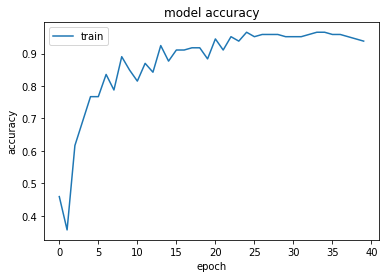

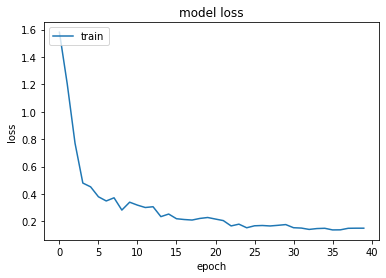

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[-2.0574195   0.39941284  1.3603762 ]
 [-4.879258   -1.8874221   4.442361  ]]

[[-2.0574195  -4.879258  ]
 [ 0.39941284 -1.8874221 ]
 [ 1.3603762   4.442361  ]]
[[ 11.328614 ]
 [  2.4824433]
 [-11.356206 ]]


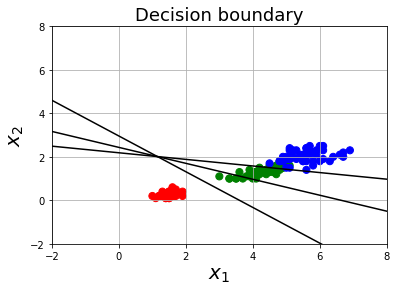

In [ ]:
colormap = np.array(['r', 'g', 'b'])
print(model.get_weights()[0])

W = np.array([
    [model.get_weights()[0][0][0], model.get_weights()[0][1][0]],
     [model.get_weights()[0][0][1], model.get_weights()[0][1][1]],
     [model.get_weights()[0][0][2], model.get_weights()[0][1][2]]
    ])
b = model.get_weights()[1].reshape(3,1)
print()
print(W)
print(b)

def plot_decision_boundary(X, Y, W, b, path):
  plt.grid()
  plt.xlim([-2, 8])
  plt.ylim([-2, 8])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary', size = 18)

  plt.scatter(X[:, 0], X[:, 1], s=50, c=colormap[gy])

  xs = np.array([-2, 8])
  ys1 = ((b[1, 0] - b[0, 0]) - (W[0, 0] - W[1, 0]) * xs) / (W[0, 1] - W[1, 1])
  ys2 = ((b[2, 0] - b[0, 0]) - (W[0, 0] - W[2, 0]) * xs) / (W[0, 1] - W[2, 1])
  ys3 = ((b[2, 0] - b[1, 0]) - (W[1, 0] - W[2, 0]) * xs) / (W[1, 1] - W[2, 1])

  plt.plot(xs, ys1, c='black')
  plt.plot(xs, ys2, c='black')
  plt.plot(xs, ys3, c='black')

  plt.savefig(path)

plot_decision_boundary(X, y, W, b, 'Decision.png')

plt.show()


plt.close()